In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Carga desde un archivo .xlsx sin indice
df= pd.read_csv('moviesNoLimpio.csv')
print (df.head())

   millones    budget                                 company country  \
0       8.0   8000000           Columbia Pictures Corporation     USA   
1       6.0   6000000                      Paramount Pictures     USA   
2      15.0  15000000                      Paramount Pictures     USA   
3      18.5  18500000  Twentieth Century Fox Film Corporation     USA   
4       9.0   9000000                    Walt Disney Pictures     USA   

         director      genre      gross                      name rating  \
0      Rob Reiner  Adventure   52287414               Stand by Me      R   
1     John Hughes     Comedy   70136369  Ferris Bueller's Day Off  PG-13   
2      Tony Scott     Action  179800601                   Top Gun     PG   
3   James Cameron     Action   85160248                    Aliens      R   
4  Randal Kleiser  Adventure   18564613   Flight of the Navigator     PG   

     released  runtime  score               star   votes         writer  year  
0  22/08/1986       89  

In [14]:
# Eliminar todas las filas donde el presupuesto es 0 o bien no hay dato
df = df[df['budget'].notna() & (df['budget'] != 0)]
print (df.head())

   millones    budget                                 company country  \
0       8.0   8000000           Columbia Pictures Corporation     USA   
1       6.0   6000000                      Paramount Pictures     USA   
2      15.0  15000000                      Paramount Pictures     USA   
3      18.5  18500000  Twentieth Century Fox Film Corporation     USA   
4       9.0   9000000                    Walt Disney Pictures     USA   

         director      genre      gross                      name rating  \
0      Rob Reiner  Adventure   52287414               Stand by Me      R   
1     John Hughes     Comedy   70136369  Ferris Bueller's Day Off  PG-13   
2      Tony Scott     Action  179800601                   Top Gun     PG   
3   James Cameron     Action   85160248                    Aliens      R   
4  Randal Kleiser  Adventure   18564613   Flight of the Navigator     PG   

     released  runtime  score               star   votes         writer  year  
0  22/08/1986       89  

In [16]:
# Filtrar películas de comedia con puntaje mayor a 8.5
comedy_high_score = df[(df['genre'] == 'Comedy') & (df['score'] > 8.5)]
print (comedy_high_score)

      millones    budget                  company country         director  \
1762      55.0  55000000       Paramount Pictures     USA  Robert Zemeckis   
2425      20.0  20000000  Melampo Cinematografica   Italy  Roberto Benigni   

       genre      gross               name rating    released  runtime  score  \
1762  Comedy  330252182       Forrest Gump  PG-13  06/07/1994      142    8.8   
2425  Comedy   57598247  Life Is Beautiful  PG-13  12/02/1999      116    8.6   

                 star    votes           writer  year  
1762        Tom Hanks  1402876    Winston Groom  1994  
2425  Roberto Benigni   476021  Vincenzo Cerami  1997  


In [18]:
# Desplegar estadística descriptiva del presupuesto
print(df['budget'].describe())

count    4.638000e+03
mean     3.614560e+07
std      3.996947e+07
min      6.000000e+03
25%      1.000000e+07
50%      2.300000e+07
75%      4.600000e+07
max      3.000000e+08
Name: budget, dtype: float64


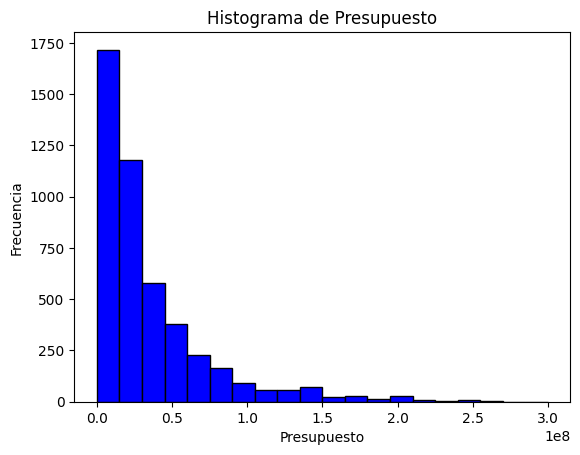

In [20]:
# Mostrar un histograma del presupuesto
plt.hist(df['budget'], bins=20, color='blue', edgecolor='black')
plt.title('Histograma de Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

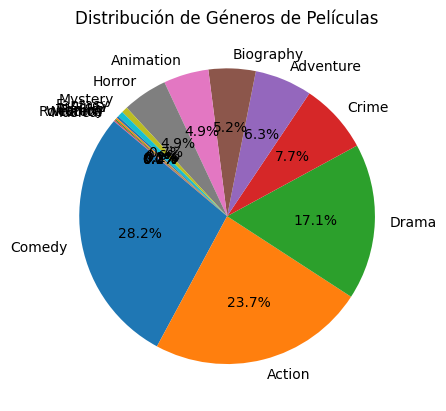

In [22]:
# Desplegar un diagrama de pastel con los géneros de las películas
genre_counts = df['genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Géneros de Películas')
plt.show()

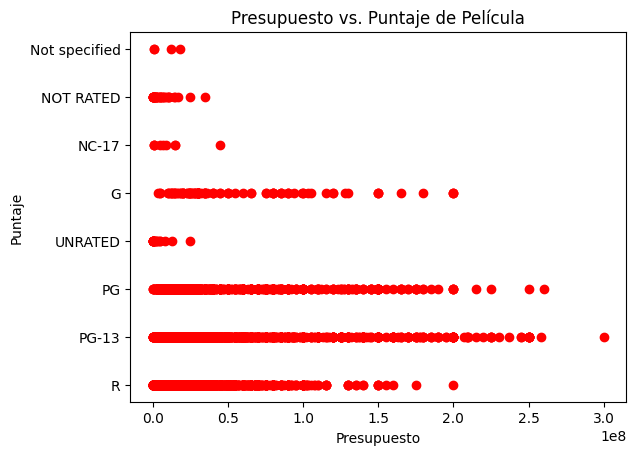

In [23]:
# Realizar un gráfico de dispersión entre el presupuesto y el puntaje de la película
plt.scatter(df['budget'], df['rating'], color='red')
plt.title('Presupuesto vs. Puntaje de Película')
plt.xlabel('Presupuesto')
plt.ylabel('Puntaje')
plt.show()

In [25]:
# Calcular el coeficiente de correlación de Pearson
df[['budget', 'score']].corr()


,budget,score
budget,1.00000,0.07344
score,0.07344,1.00000


In [29]:
# Primer filtro: Películas de acción con presupuesto mayor a 50 millones
filtro_1 = df[(df['genre'].str.contains('Action', case=False, na=False)) & (df['budget'] > 50000000)]
print(filtro_1)

      millones     budget                                 company country  \
313       55.0   55000000           Columbia Pictures Corporation     USA   
474       63.0   63000000                        Carolco Pictures     USA   
665       55.0   55000000                            Warner Bros.     USA   
884       65.0   65000000                        Carolco Pictures     USA   
900       70.0   70000000  Twentieth Century Fox Film Corporation     USA   
...        ...        ...                                     ...     ...   
6710     135.0  135000000                      Paramount Pictures     USA   
6711      60.0   60000000                        Millennium Films      UK   
6736     125.0  125000000                Disruption Entertainment     USA   
6741      80.0   80000000                    Walt Disney Pictures     USA   
6754      65.0   65000000                    Walt Disney Pictures     USA   

                  director   genre      gross  \
313             Elaine May

In [33]:
# Segundo filtro: Películas que son de comedia o de drama y tienen un presupuesto menor a 10 millones
filtro_2 = df[((df['genre'].str.contains('Comedy', case=False, na=False)) | 
(df['genre'].str.contains('Drama', case=False, na=False))) & 
(df['budget'] < 10000000)]
print(filtro_2)

      millones   budget                                  company  country  \
1          6.0  6000000                       Paramount Pictures      USA   
5          6.0  6000000                                  Hemdale       UK   
7          6.0  6000000  De Laurentiis Entertainment Group (DEG)      USA   
8          9.0  9000000                       Paramount Pictures      USA   
12         6.0  6000000   Twentieth Century Fox Film Corporation      USA   
...        ...      ...                                      ...      ...   
6739       7.0  7000000                                      A24      USA   
6793       8.0  8000000                            Cinelou Films      USA   
6794       0.9   900000                 Hidden Empire Film Group      USA   
6808       3.0  3000000                           Westerly Films  Ireland   
6809       3.8  3800000                        Sycamore Pictures      USA   

             director   genre      gross                      name rating  